In [1]:
# Import Python Package
import pandas as pd
import numpy as np

# Import sklearn package for machine learning (model fitting, predicting, cross-validation, etc.)
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression


# Import seaborn package for Seaborn is a Python data visualization library based on matplotlib.
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data load in dataframe format
df = pd.read_csv("data_download.csv")
df.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,01/18/2023,391.49,SPY 230118C00320000,01/18/2023,320.0,C,A,72.02,...,-1.0,3,3,391.45,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,01/18/2023,391.49,SPY 230118P00320000,01/18/2023,320.0,P,A,0.01,...,-1.0,2,239,391.45,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,01/18/2023,391.49,SPY 230118C00323000,01/18/2023,323.0,C,A,69.02,...,-1.0,1,0,391.45,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,01/18/2023,391.49,SPY 230118P00323000,01/18/2023,323.0,P,A,0.01,...,-1.0,0,240,391.45,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,01/18/2023,391.49,SPY 230118C00324000,01/18/2023,324.0,C,A,68.02,...,-1.0,1,0,391.45,NaN,0.0,0.0,0.0,0.0,0.0


In [3]:
# Describe the dataframe
df.describe()

,adjusted close,strike,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
count,16082.000000,16082.000000,16082.000000,16082.000000,16082.000000,16082.000000,16082.000000,16082.000000,16082.000000,16082.000000,16082.000000,16082.000000,16082.000000,16082.000000
mean,394.663192,399.642706,41.981499,40.958442,41.463644,0.220854,1077.628778,2429.736351,394.602981,0.009933,0.370913,0.005592,-0.047351,0.208986
std,3.139922,101.368060,61.944867,61.223120,61.584353,0.266769,11255.303873,8560.508142,3.119923,0.636863,0.511134,0.009675,0.066205,0.953438
min,391.490000,120.000000,0.010000,0.000000,0.000000,-1.000000,0.000000,0.000000,391.450000,-1.000000,0.000000,0.000000,-0.826718,-3.768133
25%,391.490000,345.000000,0.660000,0.540000,0.600000,0.172242,0.000000,0.000000,391.450000,-0.359970,0.006046,0.000243,-0.065747,-0.024999
50%,397.770000,391.000000,14.650000,13.665000,14.132500,0.218338,0.000000,75.000000,397.690000,-0.000000,0.130951,0.002275,-0.028011,0.000000
75%,397.770000,441.000000,54.280000,53.047500,53.575000,0.293078,50.000000,1389.250000,397.690000,0.577763,0.552372,0.006323,-0.003442,0.120913
max,397.770000,720.000000,331.000000,328.450000,328.545000,1.167055,450137.000000,172598.000000,397.690000,1.000000,2.608893,0.105043,0.000000,5.621595


In [4]:
# Study correlation between the all features
df.corr()

/var/folders/st/0vwmnbx52s9fx56m78r0bz_00000gn/T/ipykernel_87745/2549784901.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,adjusted close,strike,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
adjusted close,1.000000,-0.002019,-0.001416,-0.003028,-0.002232,-0.014362,-0.021158,-0.005678,1.000000,0.027822,0.005133,0.002976,0.010793,0.005902
strike,-0.002019,1.000000,0.129505,0.130476,0.129909,-0.243756,-0.004351,-0.067207,-0.002019,-0.499914,-0.095705,-0.016708,0.180755,-0.164232
ask,-0.001416,0.129505,1.000000,0.999753,0.999935,0.206815,-0.059359,-0.165265,-0.001416,-0.056733,-0.014730,-0.234387,0.194088,0.281276
bid,-0.003028,0.130476,0.999753,1.000000,0.999939,0.208600,-0.058644,-0.163618,-0.003028,-0.058359,-0.030599,-0.232671,0.191831,0.275126
mean price,-0.002232,0.129909,0.999935,0.999939,1.000000,0.207699,-0.058995,-0.164420,-0.002232,-0.057541,-0.022617,-0.233481,0.192902,0.278234
iv,-0.014362,-0.243756,0.206815,0.208600,0.207699,1.000000,-0.184150,0.040295,-0.014362,0.165301,0.010583,-0.065846,-0.076705,0.068637
volume,-0.021158,-0.004351,-0.059359,-0.058644,-0.058995,-0.184150,1.000000,0.152201,-0.021158,-0.016329,-0.049292,0.157624,-0.150090,-0.021934
open interest,-0.005678,-0.067207,-0.165265,-0.163618,-0.164420,0.040295,0.152201,1.000000,-0.005678,-0.010502,-0.041784,0.089784,-0.113530,-0.061854
stock price for iv,1.000000,-0.002019,-0.001416,-0.003028,-0.002232,-0.014362,-0.021158,-0.005678,1.000000,0.027822,0.005133,0.002976,0.010793,0.005902
delta,0.027822,-0.499914,-0.056733,-0.058359,-0.057541,0.165301,-0.016329,-0.010502,0.027822,1.000000,0.130459,-0.034268,-0.322506,0.459805


/var/folders/st/0vwmnbx52s9fx56m78r0bz_00000gn/T/ipykernel_87745/673637087.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

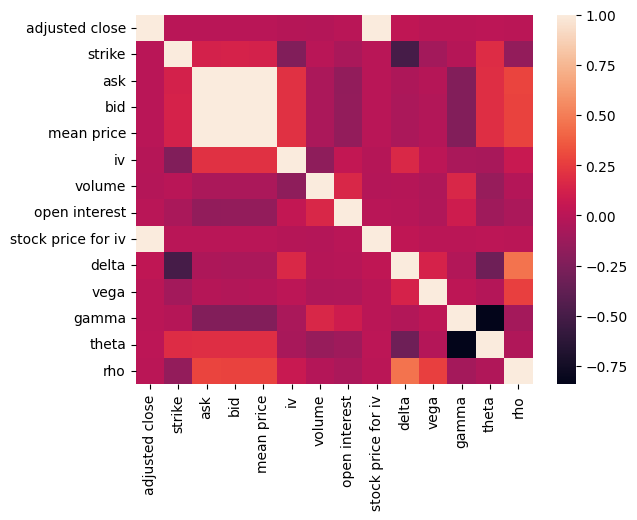

In [5]:
# Visual correlations between all features in graphical representation
sns.heatmap(df.corr())

In [6]:
# Data extraction from date 2023, January 17
jan17 = df.loc[
    (df["date"] == "01/17/2023") & (df["strike"] < 500) & (df["strike"] > 200)
]
jan17.describe()

,adjusted close,strike,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
count,6.766000e+03,6766.000000,6766.000000,6766.000000,6766.000000,6766.000000,6766.000000,6766.000000,6766.00,6766.000000,6766.000000,6766.000000,6766.000000,6766.000000
mean,3.977700e+02,376.745344,30.389917,29.429857,29.908688,0.204099,1008.436890,2631.913686,397.69,0.093751,0.401885,0.006563,-0.054913,0.214724
std,5.684762e-14,60.020900,39.496715,38.709696,39.100037,0.266434,11821.231072,9088.583244,0.00,0.617451,0.525741,0.010429,0.068790,1.008652
min,3.977700e+02,205.000000,0.010000,0.000000,0.000000,-1.000000,0.000000,0.000000,397.69,-1.000000,0.000000,0.000000,-0.815692,-3.757346
25%,3.977700e+02,343.000000,0.940000,0.882500,0.910000,0.173763,0.000000,1.000000,397.69,-0.232857,0.012885,0.000609,-0.073913,-0.037489
50%,3.977700e+02,382.000000,14.135000,13.305000,13.787500,0.218232,1.000000,103.000000,397.69,0.000000,0.164402,0.003067,-0.038031,0.000000
75%,3.977700e+02,419.000000,46.245000,44.737500,45.355000,0.288595,65.750000,1594.250000,397.69,0.711102,0.616978,0.007586,-0.011641,0.157122
max,3.977700e+02,499.000000,207.000000,202.000000,204.500000,0.819572,450137.000000,169317.000000,397.69,1.000000,2.608893,0.098681,0.000000,5.621595


In [7]:
# X :- Input features as strike and delta
X_jan17 = jan17[["delta", "iv"]]
X_jan17

,delta,iv
7956,0.000000,-1.000000
7957,0.000000,-1.000000
7958,0.000000,-1.000000
7959,0.000000,-1.000000
7960,0.000000,-1.000000
...,...,...
16015,-0.797544,0.164690
16016,0.377959,0.186080
16017,-0.829954,0.162701
16018,0.364825,0.184952


In [8]:
# y :- Output features as iv
y_jan17 = jan17["strike"]
y_jan17

7956     320.0
7957     320.0
7958     323.0
7959     323.0
7960     324.0
         ...  
16015    485.0
16016    490.0
16017    490.0
16018    495.0
16019    495.0
Name: strike, Length: 6766, dtype: float64

In [9]:
# For testing dataset
jan18 = df.loc[
    (df["date"] == "01/18/2023") & (df["strike"] < 500) & (df["strike"] > 200)
]
jan18.describe()

,adjusted close,strike,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
count,6596.00,6596.000000,6596.000000,6596.000000,6596.000000,6596.000000,6596.000000,6596.000000,6.596000e+03,6596.000000,6596.000000,6596.000000,6596.000000,6596.000000
mean,391.49,376.654184,29.964677,29.172596,29.568240,0.212567,1587.068526,2754.892207,3.914500e+02,0.054020,0.408299,0.006600,-0.056980,0.201127
std,0.00,60.369308,38.420050,37.742161,38.076408,0.293891,12838.121537,9349.698618,1.136955e-13,0.620204,0.526215,0.010217,0.070139,0.995386
min,391.49,205.000000,0.010000,0.000000,0.000000,-1.000000,0.000000,0.000000,3.914500e+02,-1.000000,0.000000,0.000000,-0.826718,-3.768133
25%,391.49,343.000000,1.030000,1.000000,1.015000,0.173305,0.000000,1.000000,3.914500e+02,-0.299942,0.012625,0.000697,-0.076808,-0.030119
50%,391.49,382.000000,14.650000,13.970000,14.247500,0.219703,2.000000,136.000000,3.914500e+02,0.000000,0.173835,0.003231,-0.038640,0.000000
75%,391.49,419.000000,45.205000,44.022500,44.571250,0.277501,111.000000,1699.750000,3.914500e+02,0.639124,0.640004,0.007775,-0.010992,0.145909
max,391.49,499.000000,201.000000,196.000000,198.500000,1.167055,337896.000000,172598.000000,3.914500e+02,1.000000,2.561855,0.105043,0.000000,5.465666


In [10]:
# X :- For testing, Input features as strike and delta
X_test = jan18[["delta", "iv"]]
X_test

,delta,iv
0,0.000000,-1.000000
1,0.000000,-1.000000
2,0.000000,-1.000000
3,0.000000,-1.000000
4,0.000000,-1.000000
...,...,...
7889,-0.859927,0.157426
7890,0.348102,0.181204
7891,-0.882916,0.157799
7892,0.334161,0.179593


In [11]:
# y :- For testing, Output features as iv
y_test = jan18["strike"]
y_test

0       320.0
1       320.0
2       323.0
3       323.0
4       324.0
        ...  
7889    485.0
7890    490.0
7891    490.0
7892    495.0
7893    495.0
Name: strike, Length: 6596, dtype: float64

In [12]:
# For graphical representation between actual and predicted value
# We have to define x-axis point which is generated from numpy array
X_axis = np.arange(1, len(y_test) + 1)
X_axis

array([   1,    2,    3, ..., 6594, 6595, 6596])

In [13]:
# Create Linear Regression Model
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_jan17, y_jan17)

LinearRegression()

In [14]:
# Predicting the Test set results
y_linear_pred = linear_regression.predict(X_test)
y_linear_pred

array([444.33746848, 444.33746848, 444.33746848, ..., 421.15246906,
       367.70967194, 422.9130626 ])

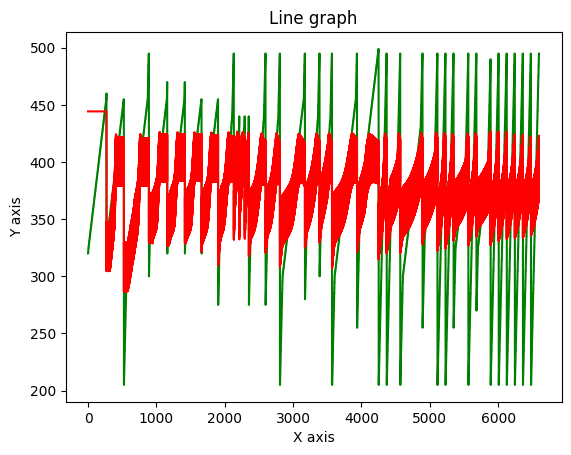

In [15]:
# Graphical representation of actual value vs predicted value
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(X_axis, y_test, color="green")
plt.plot(X_axis, y_linear_pred, color="red")
plt.show()

In [16]:
# Calculate accuracy using Mean Squared Error Method
from sklearn.metrics import mean_squared_error


# Calculate accuracy using Linear Regression Model
mse = mean_squared_error(y_test, y_linear_pred)
accuracy = (1 - mse / np.var(y_test)) * 100
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 30.37%


In [17]:
# Implement Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_jan17)
polynomial_regression = LinearRegression()
polynomial_regression.fit(X_jan17, y_jan17)

LinearRegression()

In [18]:
# Predicting the Test set results
y_polynomial_pred = polynomial_regression.predict(X_test)
y_polynomial_pred

array([444.33746848, 444.33746848, 444.33746848, ..., 421.15246906,
       367.70967194, 422.9130626 ])

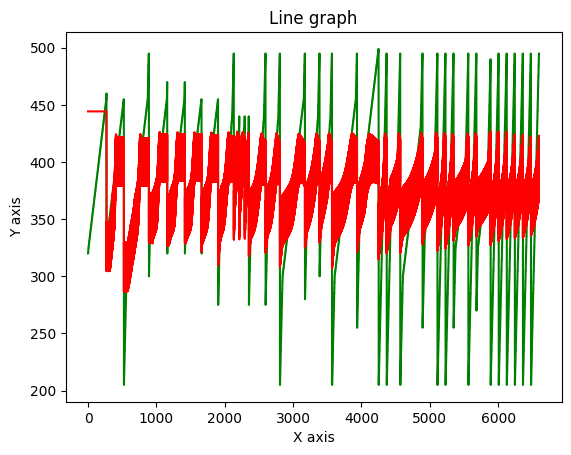

In [19]:
# Graphical representation of actual value vs predicted value
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(X_axis, y_test, color="green")
plt.plot(X_axis, y_polynomial_pred, color="red")
plt.show()

In [20]:
# Calculate accuracy using Mean Squared Error Method
from sklearn.metrics import mean_squared_error


# Calculate accuracy using Linear Regression Model
mse = mean_squared_error(y_test, y_polynomial_pred)
accuracy = (1 - mse / np.var(y_test)) * 100
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 30.37%


In [21]:
# Training the Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor(n_estimators=10, random_state=0)
random_forest_regressor.fit(X_jan17, y_jan17)

RandomForestRegressor(n_estimators=10, random_state=0)

In [22]:
# Predicting the Test set results
y_random_forest_pred = random_forest_regressor.predict(X_test)
y_random_forest_pred

array([389.30176451, 389.30176451, 389.30176451, ..., 449.        ,
       482.5       , 435.9       ])

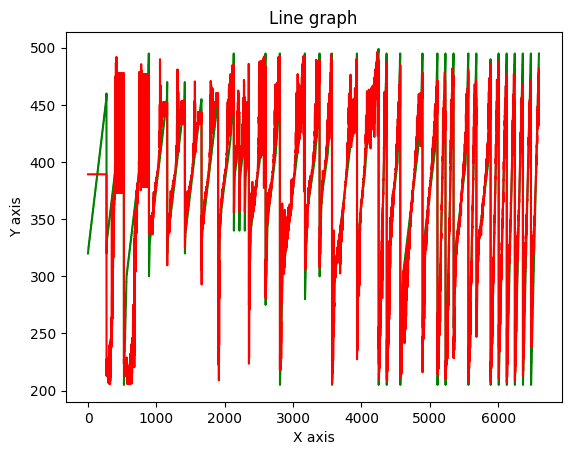

In [23]:
# Graphical representation of actual value vs predicted value
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(X_axis, y_test, color="green")
plt.plot(X_axis, y_random_forest_pred, color="red")
plt.show()

In [24]:
# Calculate accuracy using Mean Squared Error Method
from sklearn.metrics import mean_squared_error


# Calculate accuracy using Linear Regression Model
mse = mean_squared_error(y_test, y_random_forest_pred)
accuracy = (1 - mse / np.var(y_test)) * 100
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 74.81%


In [25]:
# Training the Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor = DecisionTreeRegressor(random_state=0)
decision_tree_regressor.fit(X_jan17, y_jan17)

DecisionTreeRegressor(random_state=0)

In [26]:
# Predicting the Test set results
y_decision_tree_pred = decision_tree_regressor.predict(X_test)
y_decision_tree_pred

array([389.01481481, 389.01481481, 389.01481481, ..., 480.        ,
       485.        , 417.        ])

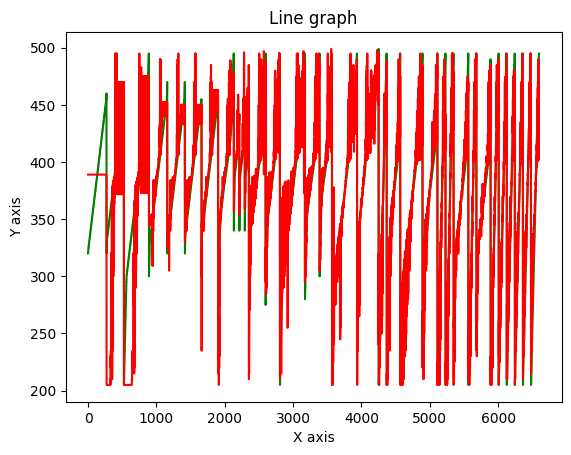

In [27]:
# Graphical representation of actual value vs predicted value
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(X_axis, y_test, color="green")
plt.plot(X_axis, y_decision_tree_pred, color="red")
plt.show()

In [28]:
# Calculate accuracy using Mean Squared Error Method
from sklearn.metrics import mean_squared_error


# Calculate accuracy using Linear Regression Model
mse = mean_squared_error(y_test, y_decision_tree_pred)
accuracy = (1 - mse / np.var(y_test)) * 100
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 69.58%
